In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-whitegrid")

In [383]:
titanic = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Exploratory Data Analysis (EDA)

Let's explore the Titanic dataset to better understand the data we're working with.

In [384]:
# Basic data information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [385]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [386]:
# Summary statistics for numerical features
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [387]:
# Target variable distribution
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [388]:
# Sex distribution
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [389]:
# Passenger class distribution
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [390]:
# Embarkation port distribution
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Visualization for better insights

<Axes: xlabel='Survived', ylabel='count'>

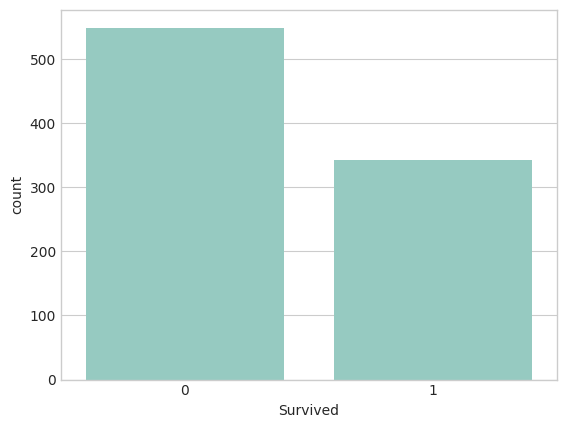

In [391]:
# Visualization of survival rate
sns.countplot(x="Survived", data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

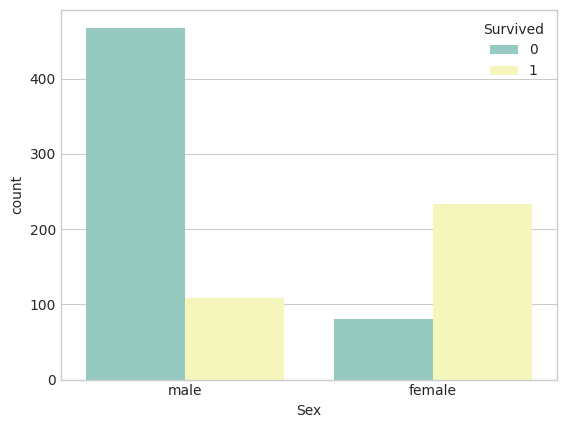

In [392]:
# Survival by sex
sns.countplot(x="Sex", hue="Survived", data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

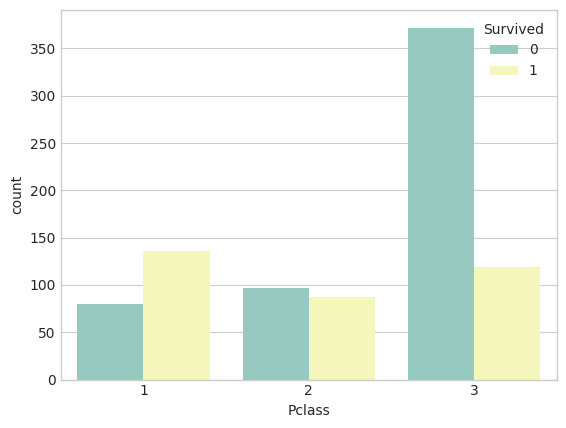

In [393]:
# Survival by passenger class
sns.countplot(x="Pclass", hue="Survived", data=titanic)

<Axes: xlabel='Age', ylabel='Count'>

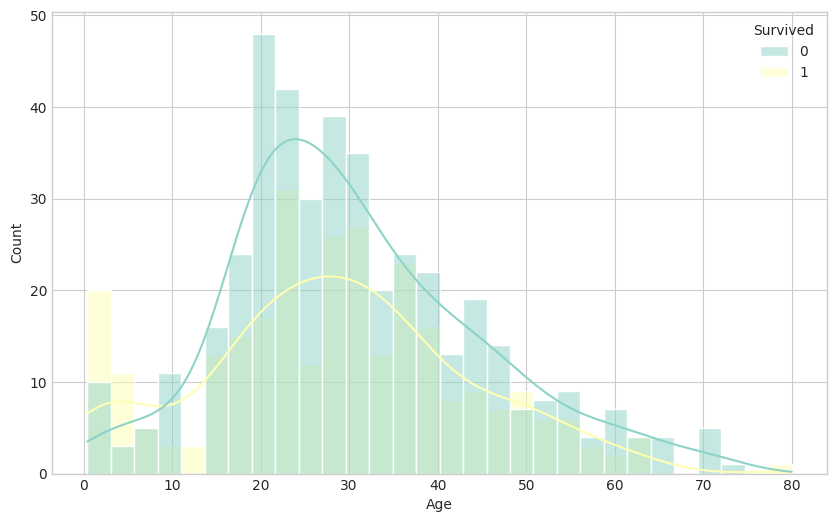

In [394]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x="Age", hue="Survived", bins=30, kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

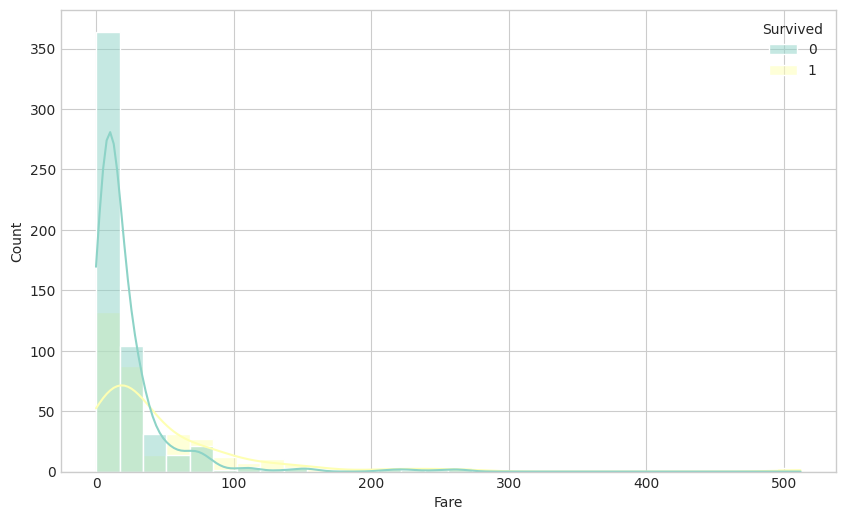

In [395]:
# Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x="Fare", hue="Survived", bins=30, kde=True)

In [396]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")


def fill_age(row):
    condition = (titanic["Pclass"] == row["Pclass"]) & (titanic["Sex"] == row["Sex"])
    return titanic[condition]["Age"].median()


titanic["Age"] = titanic.apply(
    lambda row: fill_age(row) if pd.isnull(row["Age"]) else row["Age"], axis=1
)

titanic.drop("Cabin", axis=1, inplace=True)
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
titanic.drop(["SibSp", "Parch", "PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [397]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [398]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [399]:
# One-hot encoding
cols_to_encode = ["Embarked", "Sex", "Pclass"]
titanic = pd.get_dummies(titanic, columns=cols_to_encode, drop_first=False)
cols_to_scale = ["Fare", "Age"]
scaler = StandardScaler()
titanic[cols_to_scale] = scaler.fit_transform(titanic[cols_to_scale])

In [400]:
titanic.head()

,Survived,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,-0.534891,-0.502445,1,0,0,1,0,1,0,0,1
1,1,0.668392,0.786845,1,1,0,0,1,0,1,0,0
2,1,-0.234070,-0.488854,0,0,0,1,1,0,0,0,1
3,1,0.442776,0.420730,1,0,0,1,1,0,1,0,0
4,0,0.442776,-0.486337,0,0,0,1,0,1,0,0,1


In [401]:
titanic.to_csv("titanic_cleaned.csv", index=False)

In [402]:
class logistic_regression:
    def __init__(self, learning_rate=0.01, n_iterations=5000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iterations):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return [0 if i < 0.5 else 1 for i in y_pred]

    def logistic_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [403]:
X, y = titanic.drop("Survived", axis=1), titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = logistic_regression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7932960893854749

In [404]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)
accuracy_score(y_test, y_pred_logistic)

0.8044692737430168

In [410]:
from sklearn.metrics import confusion_matrix


param_dist = {
    "C": np.logspace(-5, 5, 10),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}
model_logistic = LogisticRegression()

grid_search = GridSearchCV(
    model_logistic, param_grid=param_dist, cv=5, scoring="accuracy"
)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
y_pred_logistic = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred_logistic))
confusion_matrix(y_test, y_pred_logistic)

{'C': 0.2782559402207126, 'penalty': 'l2', 'solver': 'saga'}
0.8044692737430168


array([[91, 14],
       [21, 53]])

In [414]:
from sklearn.metrics import confusion_matrix


param_dist = {
    "C": np.logspace(-5, 5, 10),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}
model_logistic = LogisticRegression()

grid_search = RandomizedSearchCV(
    model_logistic, param_distributions=param_dist, cv=5, scoring="accuracy"
)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
y_pred_logistic = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred_logistic))
confusion_matrix(y_test, y_pred_logistic)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 46.41588833612782}
0.8100558659217877


array([[92, 13],
       [21, 53]])